In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

In [103]:
dataset= pd.read_csv('train.csv', index_col="Id")
test= pd.read_csv('test.csv', index_col="Id")

In [87]:
dataset.isnull().sum()[dataset.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [88]:
#percent = int( ((100-5)/100) * dataset.shape[0] )
#dataset = dataset.dropna(axis=1, thresh=dataset.shape[0]*0.85, how='all')
#test = test.dropna(axis=1, thresh=test.shape[0]*0.85, how='all')

dataset = dataset.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu', 'LotFrontage'], axis=1)
test = test.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu', 'LotFrontage'], axis=1)

In [91]:
dataset.fillna(dataset.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

C:\Users\Zach\AppData\Local\Temp/ipykernel_14696/3883617506.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)
C:\Users\Zach\AppData\Local\Temp/ipykernel_14696/3883617506.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace=True)


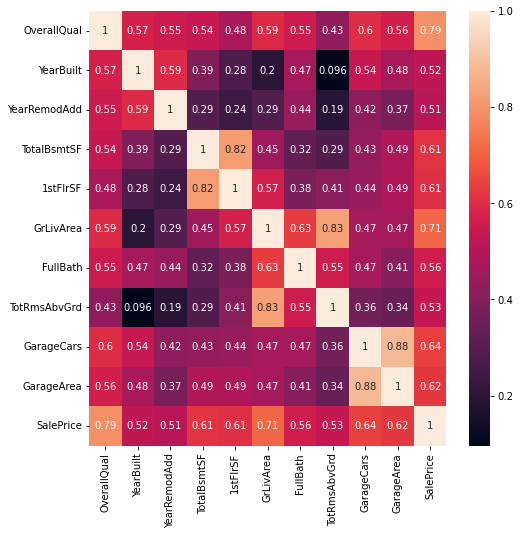

In [92]:
corr = dataset.corr()
rel_vars = corr.SalePrice[(corr.SalePrice > 0.5)]
rel_cols = list(rel_vars.index.values)

corr2 = dataset[rel_cols].corr()
plt.figure(figsize=(8,8))
hm = sns.heatmap(corr2, annot=True, annot_kws={'size':10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [93]:
dataset = pd.get_dummies(dataset, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [83]:
#dataset.fillna(X.mean(), inplace=True)
#test.fillna(test.mean(), inplace=True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset)
dataset = imputer.transform(dataset)

In [104]:
X = dataset[rel_cols[:-1]].iloc[:,1:].values
y = dataset.iloc[:, -1].values

test = test[rel_cols[:-1]].iloc[:,1:].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

In [95]:
dataset = pd.get_dummies(dataset, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [96]:
# Fit Random Forest on Training Set
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Score model
regressor.score(X_test, y_test)

0.37559748427672957

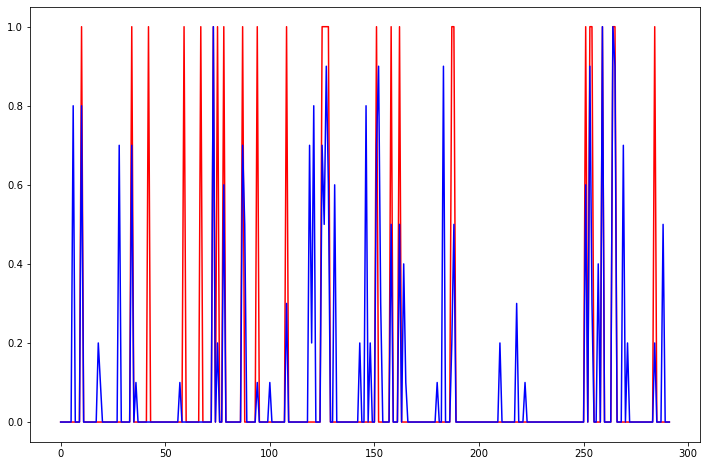

In [97]:
# Plot y_test vs y_pred
y_pred = regressor.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()

In [98]:
metrics.mean_squared_log_error(y_pred, y_test)

0.025490046590512513

In [16]:
for column in X_train:
    if column not in test:
        print(column)
        test[column] = 0

In [99]:
np.where(np.isnan(test))

(array([], dtype=int64), array([], dtype=int64))

In [100]:
y_pred2 = regressor.predict(test)

In [101]:
np.savetxt("submission.csv", y_pred2, delimiter = ",", fmt = '%f')